# Homework 1

Please, describe every step of your work and present all intermediate and final results in a Word document. If you know how, please be free to organize your submission in one Jupyter notebook.  Please, copy-past text (ASCII) version of all essential commands and snippets of results into the Word document with explanations of the purpose of those commands. We cannot retype text that is in JPG images. Please, always submit a separate copy of the original, working scripts and/or class files you used. Sometimes we need to run your code and retyping is too costly. Please include in your MS Word document all the relevant portions of the console output or output files. PLEASE DO NOT EMBED files into your MS Word document. For issues and comments visit the class Piazza site.

<b>Problem 1.</b> Use the text of the Universal Declaration of Human Rights (UDHR). 

1. Create a table for 4 languages of your choice. Use that table to collect statistics about those languages. You do not have to populate the table from your code. You may, but you may also determine individual values separately and enter them in the table manually. <br><br><i>For each language in the UHDR</i><br> a. Number of words <br> b. Number of unique words<br> c. Average length of words<br> d. Number of sentences contained<br> e. Average number of words per sentence<br>


2. Create a distribution of sentence lengths for all four language. Distribution of sentence lengths presents the number of sentences of varying length. Plot those (non-cumulative) distributions for all four languages using one diagram. (25%)

In [10]:
import nltk
import matplotlib.pyplot as plt
from nltk.corpus import udhr
from matplotlib.pyplot import figure

#Find the FileIDs of the languages
#nltk.corpus.udhr.fileids()

#Select Languages for Representation
languages = ['Italian_Italiano-Latin1', 'English-Latin1', 'Spanish-Latin1','French_Francais-Latin1']
languages

['Italian_Italiano-Latin1',
 'English-Latin1',
 'Spanish-Latin1',
 'French_Francais-Latin1']

In [23]:
#Part 1: Various Statistics of Four Languages

#Number of Words
num_words = [(lang, len(udhr.words(lang))) for lang in languages]
num_words

[('Italian_Italiano-Latin1', 1723),
 ('English-Latin1', 1781),
 ('Spanish-Latin1', 1763),
 ('French_Francais-Latin1', 1935)]

In [4]:
#Number of Unique Words
num_uniq_words = [(lang, len(set(udhr.words(lang)))) for lang in languages]
num_uniq_words

[('Italian_Italiano-Latin1', 578),
 ('English-Latin1', 533),
 ('Spanish-Latin1', 542),
 ('French_Francais-Latin1', 567)]

In [14]:
#Average Length of Words
len_words = [(lang, sum(len(i) for i in udhr.words(lang))/len(udhr.words(lang))) for lang in languages]
len_words

[('Italian_Italiano-Latin1', 4.908879860708067),
 ('English-Latin1', 4.644020213363279),
 ('Spanish-Latin1', 4.712989222915485),
 ('French_Francais-Latin1', 4.281136950904393)]

In [6]:
#Number of Sentences Contained
num_sents = [(lang, len(udhr.sents(lang))) for lang in languages]
num_sents

[('Italian_Italiano-Latin1', 51),
 ('English-Latin1', 67),
 ('Spanish-Latin1', 58),
 ('French_Francais-Latin1', 57)]

In [7]:
#Average Number of Words per Sentence
wps = [(lang,(len(udhr.words(lang))/len(udhr.sents(lang)))) for lang in languages]
wps

[('Italian_Italiano-Latin1', 33.78431372549019),
 ('English-Latin1', 26.582089552238806),
 ('Spanish-Latin1', 30.396551724137932),
 ('French_Francais-Latin1', 33.94736842105263)]

In [8]:
import pandas as pd
udhrStats = pd.DataFrame()

#Manually Insert Values (from values above) in Pandas

#Number of Words
udhrStats.at['Italian_Italiano-Latin1', 'Number of Words'] = 1723
udhrStats.at['English-Latin1', 'Number of Words'] = 1781
udhrStats.at['Spanish-Latin1', 'Number of Words'] = 1763
udhrStats.at['French_Francais-Latin1', 'Number of Words'] =  1935

#Number of Unique Words
udhrStats.at['Italian_Italiano-Latin1', 'Number of Unique Words'] = 578
udhrStats.at['English-Latin1', 'Number of Unique Words'] = 533
udhrStats.at['Spanish-Latin1', 'Number of Unique Words'] = 542
udhrStats.at['French_Francais-Latin1', 'Number of Unique Words'] = 567

#Average Length of Words
udhrStats.at['Italian_Italiano-Latin1', 'Average Length of Words'] = 4.908879860708067
udhrStats.at['English-Latin1', 'Average Length of Words'] = 4.644020213363279
udhrStats.at['Spanish-Latin1', 'Average Length of Words'] = 4.712989222915485
udhrStats.at['French_Francais-Latin1', 'Average Length of Words'] = 4.281136950904393

#Number of Sentences Contained
udhrStats.at['Italian_Italiano-Latin1', 'Number of Sentences Contained'] = 51
udhrStats.at['English-Latin1', 'Number of Sentences Contained'] = 67
udhrStats.at['Spanish-Latin1', 'Number of Sentences Contained'] = 58
udhrStats.at['French_Francais-Latin1', 'Number of Sentences Contained'] = 57

#Average Number of Words per Sentence
udhrStats.at['Italian_Italiano-Latin1', 'Average Number of Words per Sentence'] = 33.78431372549019
udhrStats.at['English-Latin1', 'Average Number of Words per Sentence'] = 26.582089552238806
udhrStats.at['Spanish-Latin1', 'Average Number of Words per Sentence'] = 30.396551724137932
udhrStats.at['French_Francais-Latin1', 'Average Number of Words per Sentence'] = 33.94736842105263

udhrStats

,Number of Words,Number of Unique Words,Average Length of Words,Number of Sentences Contained,Average Number of Words per Sentence
Italian_Italiano-Latin1,1723.0,578.0,4.908880,51.0,33.784314
English-Latin1,1781.0,533.0,4.644020,67.0,26.582090
Spanish-Latin1,1763.0,542.0,4.712989,58.0,30.396552
French_Francais-Latin1,1935.0,567.0,4.281137,57.0,33.947368


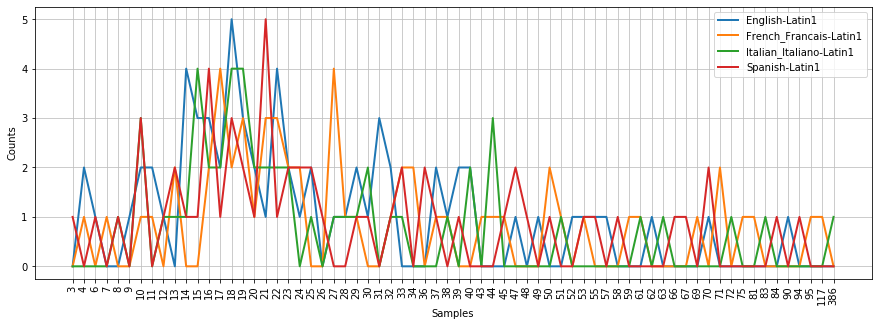

In [10]:
#Part 2: Variable Length of Each Sentence in Each Language
length = nltk.ConditionalFreqDist((lang, len(sents)) for lang in languages for sents in udhr.sents(lang))
figure(figsize=(15, 5))
length.plot(cumulative=False)

<b>Problem 2.</b> Use the text of the Inaugural Addresses (Inaugural). 

1. Identify 10 most frequently used words longer than 7 characters in the entire corpus of Inaugural Addresses. Do not identify 10 words for every speech but rather 10 words for the entire corpus. Which among those words has the largest number of synonyms? 
2. List all synonyms for those 10 words
3. Which one of those 10 words has the largest number of hyponyms? 
4. List all hyponyms of those 10 most frequently used “long” words. 

The purpose of this problem is to familiarize you with WordNet and concepts of synonyms and hyponyms. (25%)

<i> Note: Read Chapter 2 in http://www.nltk.org/book/ </i>

In [5]:
import nltk
from nltk import FreqDist
from collections import Counter
from nltk.corpus import inaugural
from nltk.corpus import wordnet as wn

#Part 1: Most Used Words Over 7 in Character Length

#Find the frequency of the top ten inaugural words 
freq = [s.title() for s in inaugural.words() if len(s) >= 7]
#fdist = FreqDist(freq)
#test = fdist.keys()

#Find the most commonly used words of the above list
words_to_count = (word for word in freq)
most_common = [i for (i,j) in Counter(words_to_count).most_common(10)]

#Count the synonyms 
synonym_counts = [(i, len(set(synset.lemma_names()))) for i in most_common for synset in wn.synsets(i)]
synonym_counts

#Constitution has the most synonyms of this group (7+ letters)
#Clarified in person with the professor that the below (and subsequent) output type is an acceptable submission
#Note: Government is counted differently than government

[('Government', 3),
 ('Government', 5),
 ('Government', 1),
 ('Government', 3),
 ('Country', 7),
 ('Country', 3),
 ('Country', 3),
 ('Country', 2),
 ('Country', 2),
 ('Citizens', 1),
 ('America', 8),
 ('America', 1),
 ('Constitution', 3),
 ('Constitution', 5),
 ('Constitution', 5),
 ('Constitution', 5),
 ('Constitution', 2),
 ('Nations', 7),
 ('Nations', 3),
 ('Nations', 3),
 ('Nations', 1),
 ('Freedom', 1),
 ('Freedom', 2),
 ('American', 1),
 ('American', 3),
 ('American', 1),
 ('American', 1),
 ('American', 1),
 ('National', 2),
 ('National', 1),
 ('National', 1),
 ('National', 1),
 ('National', 1),
 ('National', 4),
 ('National', 1),
 ('National', 1)]

In [7]:
#Part 2: List all synonyms for those 10 words

synonyms = [(i, synset.lemma_names()) for i in most_common for synset in wn.synsets(i)]
synonyms

[('Government', ['government', 'authorities', 'regime']),
 ('Government',
  ['government',
   'governing',
   'governance',
   'government_activity',
   'administration']),
 ('Government', ['government']),
 ('Government', ['politics', 'political_science', 'government']),
 ('Country',
  ['state',
   'nation',
   'country',
   'land',
   'commonwealth',
   'res_publica',
   'body_politic']),
 ('Country', ['country', 'state', 'land']),
 ('Country', ['nation', 'land', 'country']),
 ('Country', ['country', 'rural_area']),
 ('Country', ['area', 'country']),
 ('Citizens', ['citizen']),
 ('America',
  ['United_States',
   'United_States_of_America',
   'America',
   'the_States',
   'US',
   'U.S.',
   'USA',
   'U.S.A.']),
 ('America', ['America']),
 ('Constitution', ['fundamental_law', 'organic_law', 'constitution']),
 ('Constitution',
  ['constitution',
   'establishment',
   'formation',
   'organization',
   'organisation']),
 ('Constitution',
  ['United_States_Constitution',
   'U.S._Con

In [8]:
#Part 3: Largest Number of Hyponyms

hyponyms = [(i, sum(len(set(hyponyms.lemma_names())) for hyponyms in synset.hyponyms())) for i in most_common for synset in wn.synsets(i)]
hyponyms

#American has the most hyponyms of this group (7+ letters)

[('Government', 23),
 ('Government', 6),
 ('Government', 0),
 ('Government', 3),
 ('Country', 18),
 ('Country', 22),
 ('Country', 15),
 ('Country', 10),
 ('Country', 50),
 ('Citizens', 9),
 ('America', 0),
 ('America', 0),
 ('Constitution', 0),
 ('Constitution', 10),
 ('Constitution', 0),
 ('Constitution', 7),
 ('Constitution', 0),
 ('Nations', 18),
 ('Nations', 15),
 ('Nations', 0),
 ('Nations', 2),
 ('Freedom', 14),
 ('Freedom', 5),
 ('American', 99),
 ('American', 8),
 ('American', 7),
 ('American', 0),
 ('American', 0),
 ('National', 4),
 ('National', 0),
 ('National', 0),
 ('National', 0),
 ('National', 0),
 ('National', 0),
 ('National', 0),
 ('National', 0)]

In [9]:
#Part 4: List all hyponyms for those 10 words

hyponyms = [(i, [hyponyms.lemma_names() for hyponyms in synset.hyponyms()]) for i in most_common for synset in wn.synsets(i)]
hyponyms

[('Government',
  [['ancien_regime'],
   ['authoritarian_state', 'authoritarian_regime'],
   ['bureaucracy'],
   ['court', 'royal_court'],
   ['Downing_Street'],
   ['empire'],
   ['federal_government'],
   ['government-in-exile'],
   ['local_government'],
   ['military_government', 'stratocracy'],
   ['palace'],
   ['papacy', 'pontificate'],
   ['puppet_government', 'puppet_state', 'pupet_regime'],
   ['state'],
   ['state_government'],
   ['totalitarian_state', 'totalitation_regime']]),
 ('Government',
  [['legislation', 'legislating', 'lawmaking'],
   ['misgovernment', 'misrule'],
   ['trust_busting']]),
 ('Government', []),
 ('Government', [['geopolitics'], ['realpolitik', 'practical_politics']]),
 ('Country',
  [['ally'],
   ['city_state', 'city-state'],
   ['commonwealth_country'],
   ['developing_country'],
   ['Dominion'],
   ['foreign_country'],
   ['Reich'],
   ['rogue_state', 'renegade_state', 'rogue_nation'],
   ['sea_power'],
   ['suzerain'],
   ['world_power', 'major_powe

<b>Problem 3.</b> 

Consider 100 points along the straight line in the (x,y) plane represented by the linear equation y=0.3x+0.2. Distribute those points along the line uniformly in the interval between -2.0 and 3.0. To the y coordinate of each point add a random normally distributed value with standard deviation of 1 and mean 0. You have created and artificial set of random measurements. 

1. Create a shallow neural network with one layer which will be able to predict y value corresponding to any x value in the above interval. Implement and train the network using Keras API. 

2. Report on the accuracy of your model. 

This is a rather trivial problem and you do not need neural networks to solve it. We are practicing Keras API.

Using TensorFlow backend.


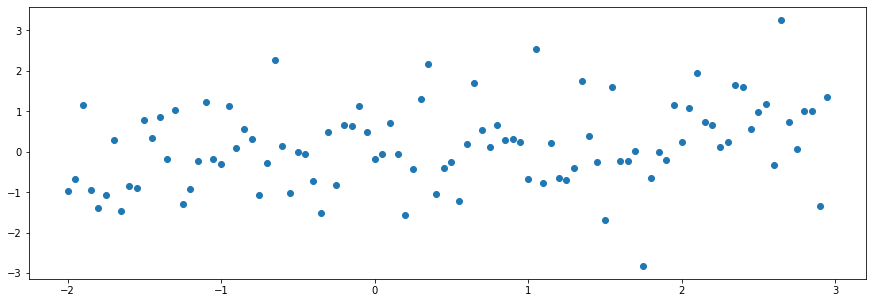

In [28]:
import keras
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.pyplot import figure
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop,Adam
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.utils import to_categorical

#Plot 100 points between -2 and 3
figure(figsize=(15, 5))
formula = '0.3*x + 0.2'
x = np.arange(-2.00, 3.00, 0.05) 

#Add Random Normal Distribution
mu, sigma = 0, 1 # mean and standard deviation
y = eval(formula) + np.random.normal(mu, sigma,100)

plt.scatter(x, y)
plt.show()

In [29]:
keras.backend.clear_session()

In [30]:
#Divide Training and Test Samples
train_x, val_x, train_y, val_y = train_test_split(x, y, test_size=0.2, random_state=42,shuffle=True) #20/80 Split

#Build a One Layer Model
model_3 = Sequential()
model_3.add(Dense(50, input_shape=(1,))) #First Layer (50 Neurons)
model_3.add(Activation('linear'))
model_3.add(Dense(1)) #Output Layer

#Show Model Architecture         
model_3.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                100       
_________________________________________________________________
activation_1 (Activation)    (None, 50)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________


In [11]:
#Train the Model
model_3.compile(optimizer='sgd', 
                loss='mean_squared_error', 
                metrics=['mae'])
history_3 = model_3.fit(train_x,
                        train_y,
                        batch_size=5,
                        epochs=10,
                        shuffle=True,
                        verbose=1,
                        validation_data = (val_x, val_y)
                       )
results = model_3.evaluate(val_x, val_y)
print(results)

Train on 80 samples, validate on 20 samples
Epoch 1/10
80/80 [==============================] - 1s 10ms/step - loss: 1.2493 - mean_absolute_error: 0.8287 - val_loss: 0.7935 - val_mean_absolute_error: 0.6559
Epoch 2/10
80/80 [==============================] - 0s 649us/step - loss: 0.9805 - mean_absolute_error: 0.7620 - val_loss: 0.7302 - val_mean_absolute_error: 0.6429
Epoch 3/10
80/80 [==============================] - 0s 601us/step - loss: 1.0018 - mean_absolute_error: 0.7540 - val_loss: 0.7266 - val_mean_absolute_error: 0.6260
Epoch 4/10
80/80 [==============================] - 0s 596us/step - loss: 1.0228 - mean_absolute_error: 0.7701 - val_loss: 0.7177 - val_mean_absolute_error: 0.6230
Epoch 5/10
80/80 [==============================] - 0s 539us/step - loss: 1.0053 - mean_absolute_error: 0.7432 - val_loss: 0.7241 - val_mean_absolute_error: 0.6473
Epoch 6/10
80/80 [==============================] - 0s 617us/step - loss: 1.0203 - mean_absolute_error: 0.7564 - val_loss: 0.7150 - val_m

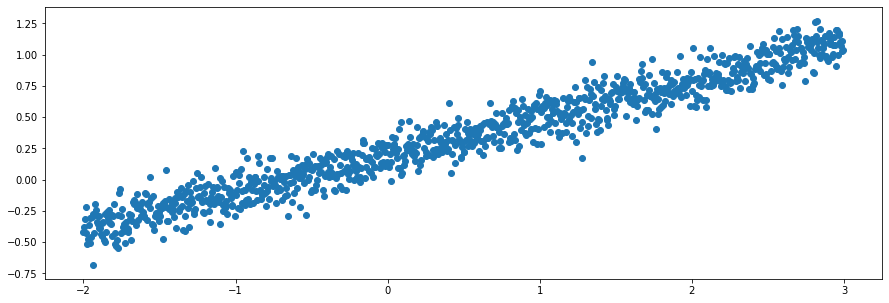

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 50)                100       
_________________________________________________________________
activation_2 (Activation)    (None, 50)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 51        
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________
Instructions for updating:
Use tf.cast instead.
Train on 800 samples, validate on 200 samples
Epoch 1/10
800/800 [==============================] - 1s 1ms/step - loss: 0.0269 - mean_absolute_error: 0.1041 - val_loss: 0.0116 - val_mean_absolute_error: 0.0835
Epoch 2/10
800/800 [==============================] - 0s 470us/step - loss: 0.0111 - mean_absolute_error: 0.0848 - val_loss: 0.0114 - val_mean_absolut

In [31]:
#Repeat with less noise and more values
import numpy as np

#Plot 1000 points between -2 and 3
figure(figsize=(15, 5))
formula = '0.3*x + 0.2'
x = np.arange(-2.00, 3.00, 0.005) 

#Add Random Normal Distribution
mu, sigma = 0, 0.1 # mean and standard deviation
y = eval(formula) + np.random.normal(mu, sigma,1000)

plt.scatter(x, y)
plt.show()

#Divide Training and Test Samples
train_x, val_x, train_y, val_y = train_test_split(x, y, test_size=0.2, random_state=42,shuffle=True) #20/80 Split

#Build a One Layer Model
model_3 = Sequential()
model_3.add(Dense(50, input_shape=(1,))) #First Layer (50 Neurons)
model_3.add(Activation('linear'))
model_3.add(Dense(1)) #Output Layer

#Show Model Architecture         
model_3.summary()

#Train the Model
model_3.compile(optimizer='sgd', 
                loss='mean_squared_error', 
                metrics=['mae'])
history_3 = model_3.fit(train_x,
                        train_y,
                        batch_size=5,
                        epochs=10,
                        shuffle=True,
                        verbose=1,
                        validation_data = (val_x, val_y)
                       )
results = model_3.evaluate(val_x, val_y)
print(results) #Less Error!

<b>Problem 4.</b> Consider three points in (x,y) plane with coordinates (-2,0), (0,1.7) and (2.1,0). 

1. Around each of those three centers create a cloud of 100 randomly generated points. For the radial distance of any one of those points from its center use a random normal distribution.  For the angular coordinate of any one of “cloud” points use the uniform distribution. Once you have generated all three sets of cloud points plot them in the same diagram using three different colors. There should exist some overlap between the clouds. 

2. Create a two-layer neural network. Use Keras API. Fit a model that could predict whether a randomly generated point in the plane belongs to cloud 1, centered around (-2,0), cloud 2, centered around (0,1.7) or cloud 3, centered around (2.1,0). 

You can make that prediction in a much simpler way, however, we are practicing Keras API.

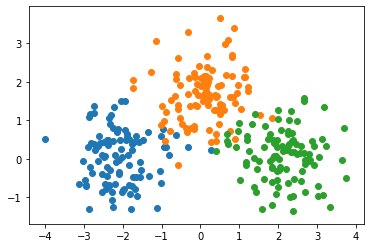

In [123]:
#Part 1: Create three sample clouds

#Create points 
num_points=100

#Create Coordinate Values
point1 = [-2,0]
point2 = [0,1.7]
point3 = [2.1,0]

#Covariance Matrix - using 0.5 to demonstrate overlap
cov = [[0.5, 0], [0, 0.5]]

#Cloud Samples
X1=np.random.multivariate_normal(point1, cov, num_points)
X2=np.random.multivariate_normal(point2, cov, num_points)
X3=np.random.multivariate_normal(point3, cov, num_points)

#visualize the clouds in 2-dimensional plot
plt.scatter(X1[:,0],X1[:,1])
plt.scatter(X2[:,0],X2[:,1])
plt.scatter(X3[:,0],X3[:,1])

#Plot the sample clouds
plt.show()

In [131]:
#Part 2: Predict Sample Input with Keras

#Cloud Classes
Y1=0*np.ones(num_points)
Y2=1*np.ones(num_points)
Y3=2*np.ones(num_points)

#Divide Training and Test Samples
X=np.concatenate([X1,X2,X3],axis=0)
Y=np.concatenate([Y1,Y2,Y3],axis=0)
train_x, val_x, train_y, val_y = train_test_split( X,Y, test_size=0.2, random_state=42,shuffle=True) #20/80 Split

#Build a Two Layer Model
model_4 = Sequential()
model_4.add(Dense(50, input_shape=(2,))) #First Layer (50 Neurons)
model_4.add(Activation('relu'))
model_4.add(Dense(50)) #Second Layer (50 Neurons)
model_4.add(Activation('relu'))
model_4.add(Dense(3)) #Output Layer
model_4.add(Activation('softmax'))

#Show Model Architecture         
model_4.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_57 (Dense)             (None, 50)                150       
_________________________________________________________________
activation_51 (Activation)   (None, 50)                0         
_________________________________________________________________
dense_58 (Dense)             (None, 50)                2550      
_________________________________________________________________
activation_52 (Activation)   (None, 50)                0         
_________________________________________________________________
dense_59 (Dense)             (None, 3)                 153       
_________________________________________________________________
activation_53 (Activation)   (None, 3)                 0         
Total params: 2,853
Trainable params: 2,853
Non-trainable params: 0
_________________________________________________________________


In [132]:
#Train the Model

model_4.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#train the model
history_4 = model_4.fit(train_x,train_y,
                    batch_size=32,
                    epochs=5,
                    shuffle=True,
                    verbose=1,
                    validation_data=(val_x, val_y))

Train on 240 samples, validate on 60 samples
Epoch 1/5
240/240 [==============================] - 2s 8ms/step - loss: 1.0577 - acc: 0.3958 - val_loss: 0.9418 - val_acc: 0.7667
Epoch 2/5
240/240 [==============================] - 0s 180us/step - loss: 0.8397 - acc: 0.9125 - val_loss: 0.7543 - val_acc: 0.9333
Epoch 3/5
240/240 [==============================] - 0s 200us/step - loss: 0.6630 - acc: 0.9458 - val_loss: 0.6056 - val_acc: 0.9333
Epoch 4/5
240/240 [==============================] - 0s 207us/step - loss: 0.5263 - acc: 0.9500 - val_loss: 0.4828 - val_acc: 0.9333
Epoch 5/5
240/240 [==============================] - 0s 200us/step - loss: 0.4168 - acc: 0.9625 - val_loss: 0.3856 - val_acc: 0.9667


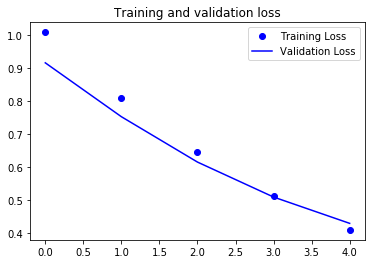

[[0.8236834  0.09222549 0.0840911 ]
 [0.13884008 0.7352062  0.12595363]
 [0.13274796 0.18044782 0.68680423]]
Results [0 1 2]


In [133]:
#Plot the results for training and validation loss
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))

plt.figure()

#Losses
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

#Clarified that this input is acceptable
inputs=np.array([[-2,0],[0,1.7],[2.1,0]])
y_pred=model_4.predict(inputs)
print(y_pred)

#Print Results in a Graph
results=np.argmax(y_pred,axis=0)
print('Results', results)